In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

if os.name == 'posix':
    plt.rc('font', family = "AppleGothic")
else:
    plt.rc('font', family = "malgun Gothic")
plt.rc("axes", unicode_minus = False)
%config InlineBackend.figure_format = 'retina'


In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


### Q1

In [3]:
df['연도'] = df['시점'].map(lambda x:int(x.split('.')[0]))

In [4]:
df['분기'] = df['시점'].map(lambda x:int(x.split('.')[1].split('/')[0]))
df['상품군별'].value_counts()

기 타             198
화장품             198
아동·유아용품         198
가전·전자·통신기기      198
사무·문구           198
농축수산물           198
생활용품 및 자동차용품    198
스포츠·레저용품        198
서 적             198
소프트웨어           198
컴퓨터 및 주변기기      198
음반·비디오·악기       198
음·식료품           198
의류 및 패션 관련상품    198
Name: 상품군별, dtype: int64

In [5]:
df = df.rename(columns = {'데이터':'백만'})
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


### Q2

In [6]:
df_p = df.pivot_table(values = '백만', index = '국가(대륙)별', columns = '연도', aggfunc = np.sum)
df_p

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


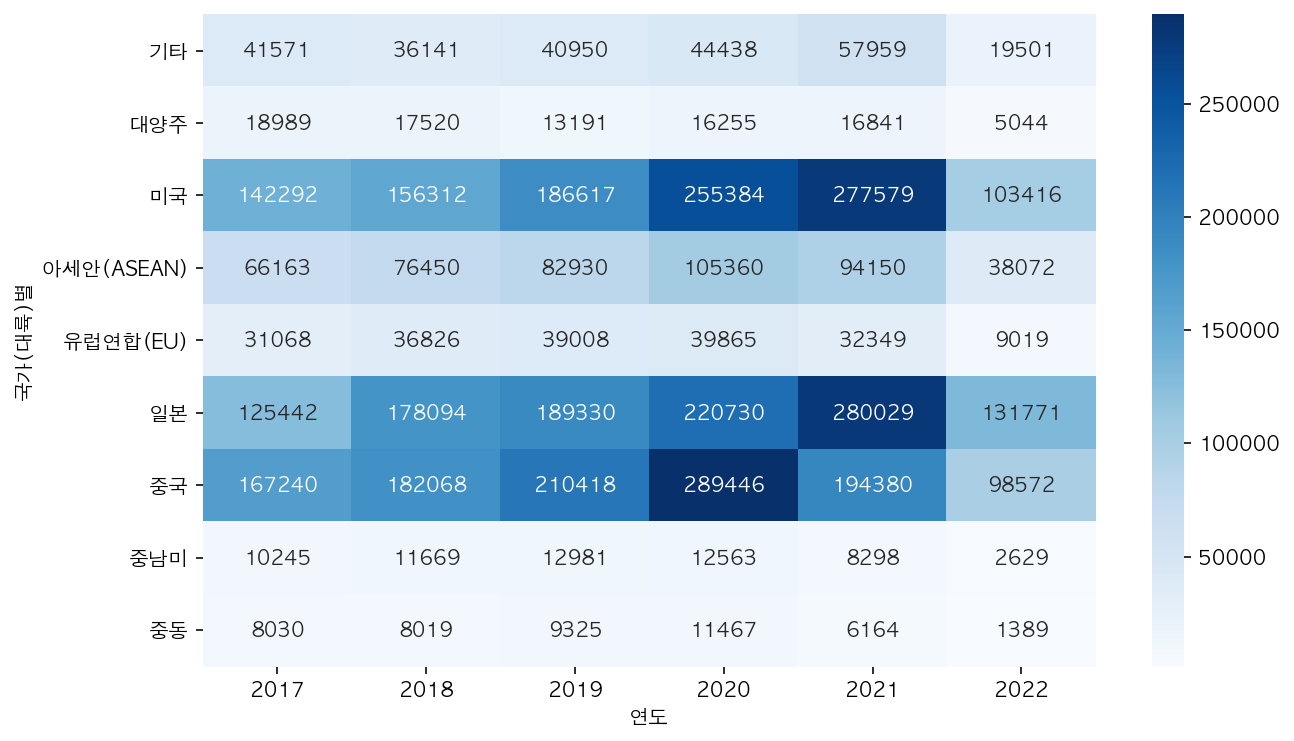

In [7]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df_p, cmap = "Blues", annot = True, fmt = '.0f')

### Q3

In [8]:
df_2020 = df[df['연도'] == 2020].copy()
df_2020.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1


In [9]:
df_2020_group = df_2020.groupby(['국가(대륙)별'])['백만'].agg(['sum'])
df_2020_group

,sum
국가(대륙)별,
기타,44438
대양주,16255
미국,255384
아세안(ASEAN),105360
유럽연합(EU),39865
일본,220730
중국,289446
중남미,12563
중동,11467


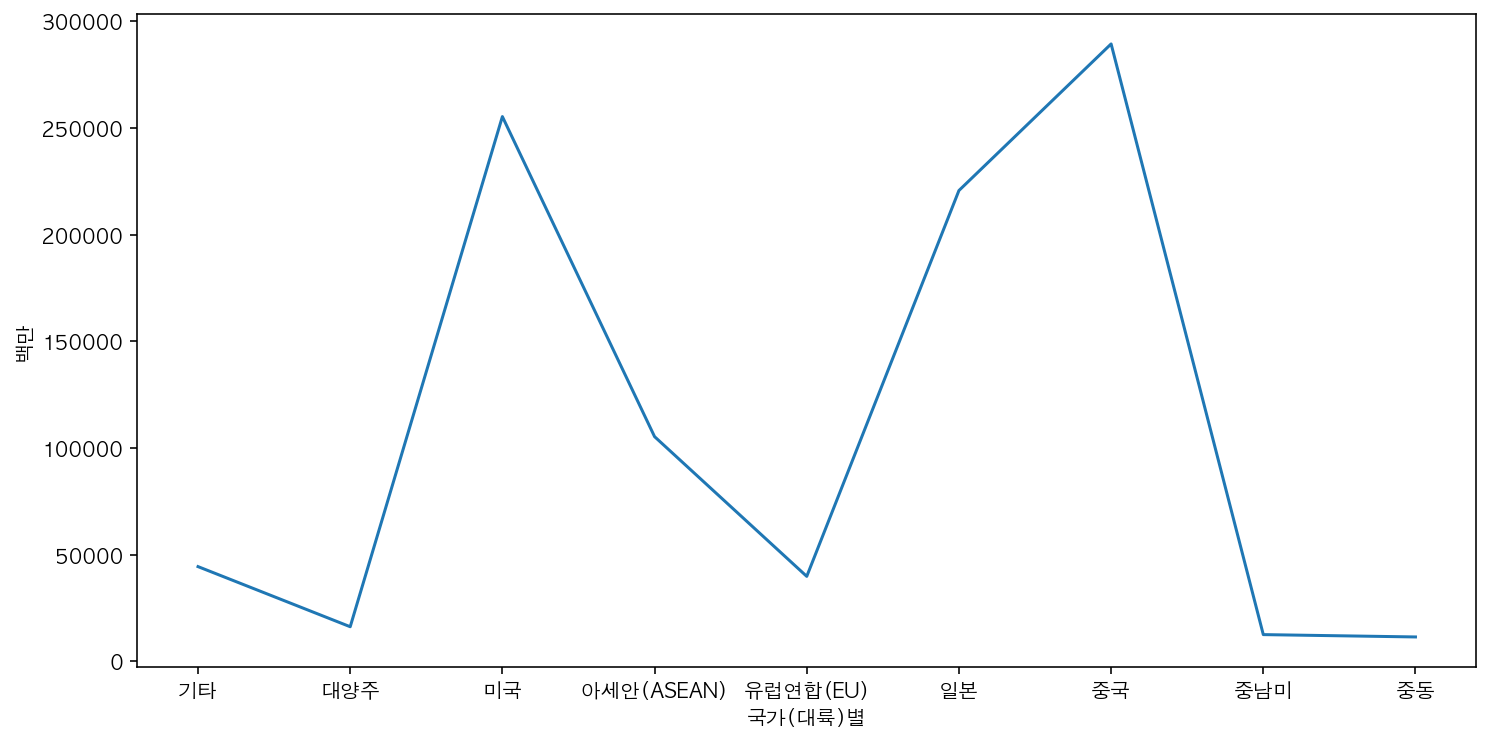

In [10]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_2020, x = '국가(대륙)별', y = '백만', 
             estimator = 'sum', ci = None)

### Q4

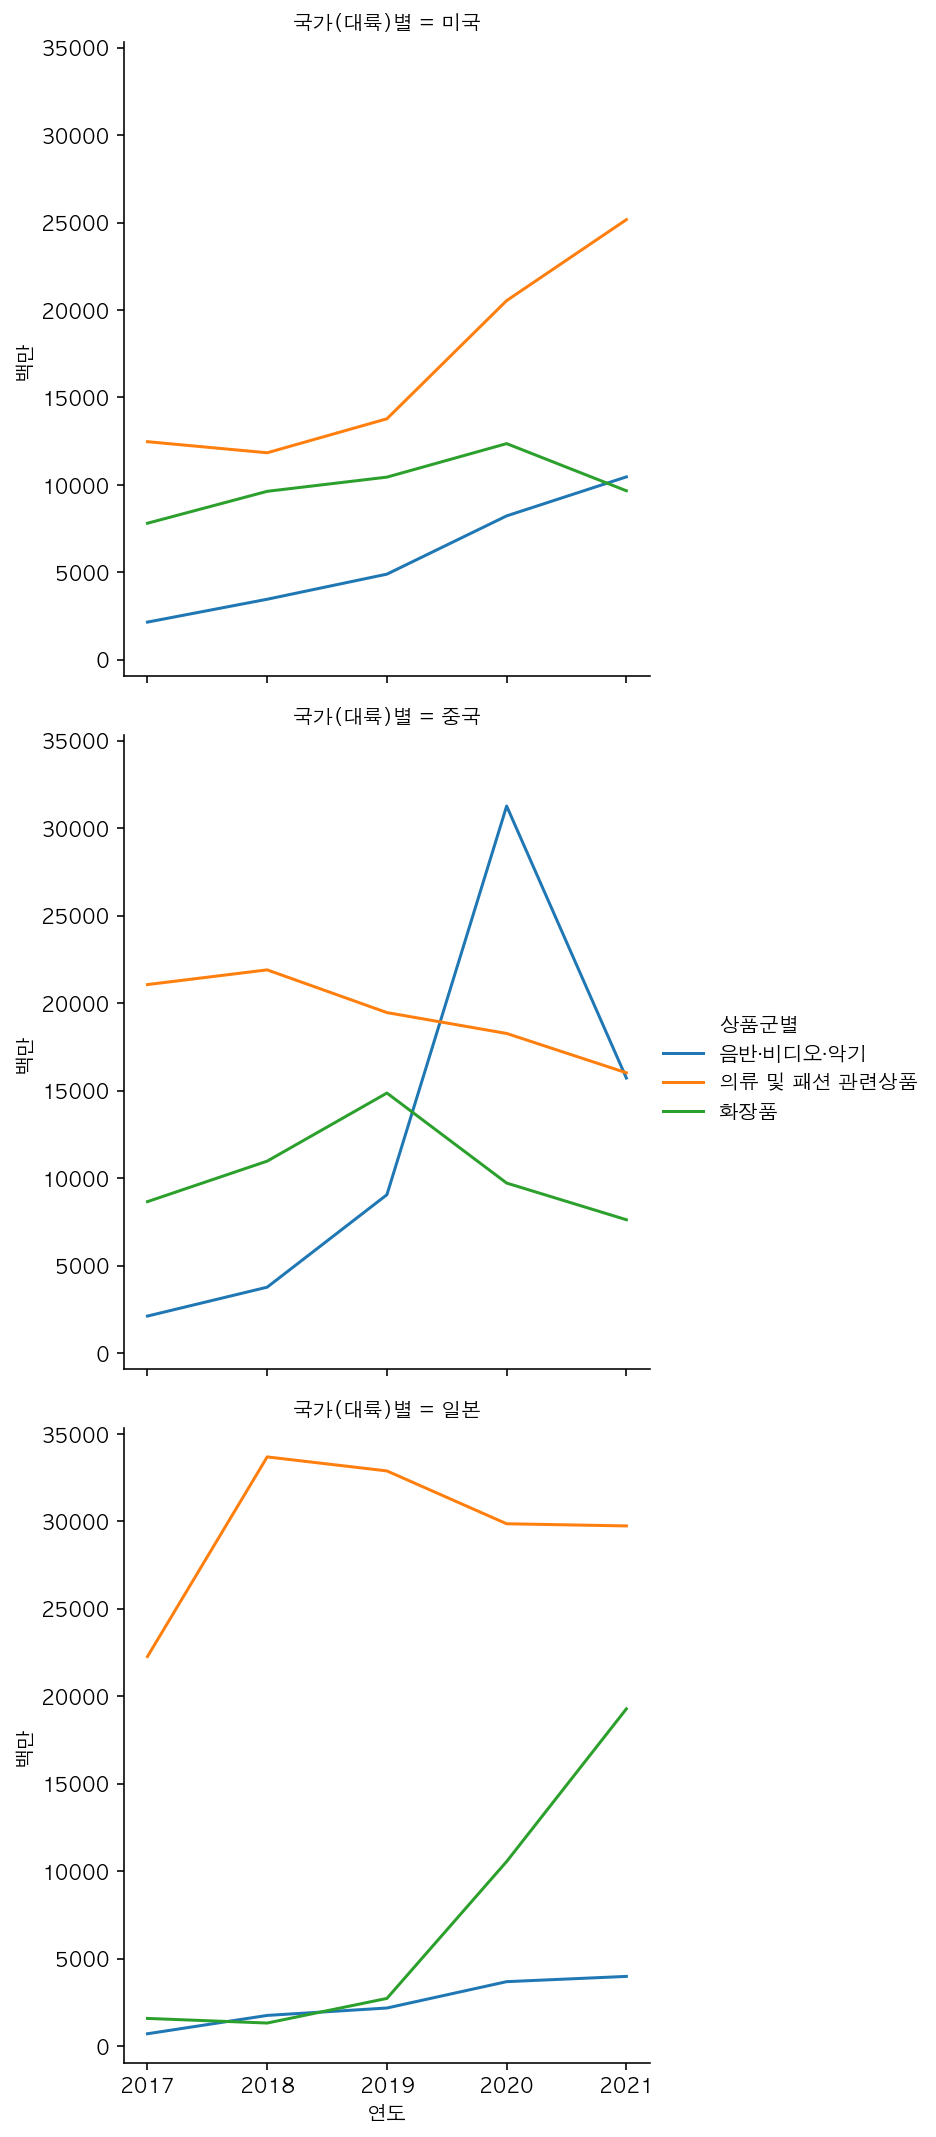

In [11]:
df_sub = df[(df['국가(대륙)별'] == '미국') | (df['국가(대륙)별'] == '중국') | (df['국가(대륙)별'] == '일본')].copy()
df_sub = df_sub[df_sub['연도'] <= 2021].copy()
df_sub = df_sub[(df_sub['상품군별'] == '화장품') | (df_sub['상품군별'] == '의류 및 패션 관련상품') 
                | (df_sub['상품군별'] == '음반·비디오·악기')].copy()

sns.relplot(data = df_sub, x = '연도', y = '백만', hue = '상품군별', 
            kind = 'line', col = '국가(대륙)별', ci = None, col_wrap = 1)